In [1]:
import pandas as pd
import random
import numpy as np
import pickle
import keras
from keras.layers import *
from keras import backend as k
from keras import optimizers
from keras.models import Model
from time import time
from keras.models import load_model
from google.colab import files
import matplotlib.pyplot as plt
from sklearn import manifold

Using TensorFlow backend.


In [2]:
uploaded = files.upload()

Saving latent_features.npy to latent_features.npy


In [0]:
mfccs_test = np.load('test_mfccs.npy')
pitches_test = np.load('test_pitches (1).npy')
loudness_test = np.load('test_loudness.npy')
test_index = np.load('TestIndices.npy')

In [0]:
latent_features = np.load('latent_features.npy')

In [0]:
def computeTSNEProjectionOfLatentSpace(X, display=True):
    
    # Compute t-SNE embedding of latent space
    print("Computing t-SNE embedding...")
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
    X_tsne = tsne.fit_transform(X)

    # Plot images according to t-sne embedding
    if display:
        print("Plotting t-SNE visualization...")
        plt.figure(figsize = (10, 10))
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], label = 'Test latent vectors')
        plt.show()
    else:
        return X_tsne

Computing t-SNE embedding...
Plotting t-SNE visualization...


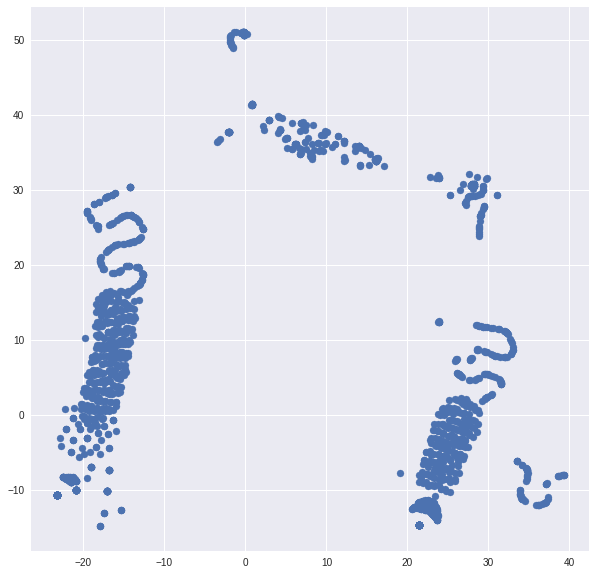

In [5]:
computeTSNEProjectionOfLatentSpace(latent_features)

In [0]:
features = np.append(mfccs_test, pitches_test, axis = 2)
test_data = np.append(features, loudness_test, axis = 2)

In [0]:
test_pred = encoder.predict(test_data, batch_size = 32)

In [0]:
test_pred.shape

(2006, 20)

In [0]:
test_pred.dump('latent_features.npy')

In [0]:
files.download('latent_features.npy')